In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
np.random.seed(400)

In [3]:
amazon = pd.read_csv('./amazon_cells_labelled.txt', sep='\t', header=None)
imdb = pd.read_csv('./imdb_labelled.txt', sep='\t', header=None)
yelp = pd.read_csv('./yelp_labelled.txt', sep='\t', header=None)

## Tweeter source
SemEval 4b:
http://alt.qcri.org/semeval2017/task4/index.php?id=data-and-tools

## Airlines source
https://www.kaggle.com/crowdflower/twitter-airline-sentiment/data

In [3]:
tweets = pd.read_csv('./tweets.txt', sep='\t', header=None)
tweets_text = [re.sub(r"http\S+", "", line) for line in tweets[3]]
tweets_labels = (tweets[2]=='positive').astype(int)

df = pd.DataFrame(data={'text':tweets_text, 'label':tweets_labels})
pos_tweets = df[df['label']==1][:100]
neg_tweets = df[df['label']==0]

tweets = pd.concat([pos_tweets, neg_tweets], axis=0)
tweets.columns=[0, 1]

air_tweets = pd.read_csv("airline_tweets.csv")
air_tweets = air_tweets[['text', 'airline_sentiment']]
air_tweets['text'] = air_tweets['text'].str.split(n=1).str[1] #Remove @airline

In [4]:
import nltk
import pandas as pd
import numpy as np
import string
from collections import defaultdict

from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn

In [6]:
from wordcloud import WordCloud, STOPWORDS 

In [7]:
def draw_wordcloud(text_data, stopwords=None):
    words = ' '
    for line in text_data:
        for word in line:
            words = words + word + ' '

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(words) 

    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

In [8]:
def lower_tokenize(text_data):
    text_data = [entry.lower() for entry in text_data]
    text_data = [word_tokenize(entry) for entry in text_data]
    return text_data

# Wstępna analiza

In [9]:
amazon

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


# Amazon

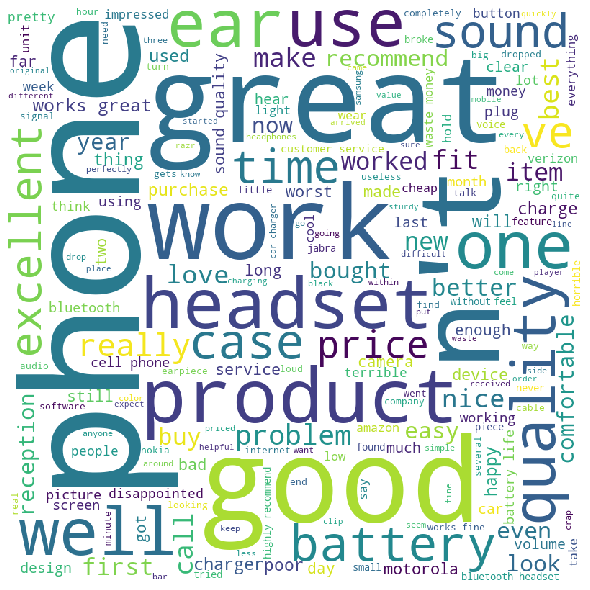

In [10]:
amazon_text = lower_tokenize(amazon[0])
draw_wordcloud(amazon_text)

In [11]:
imdb

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


# IMDB

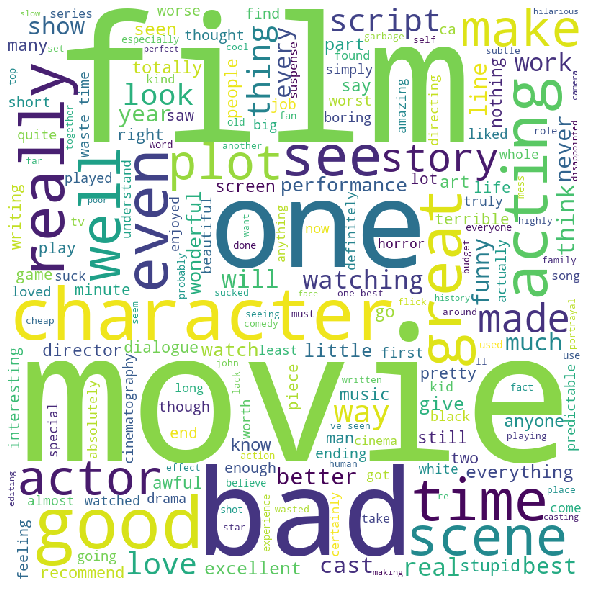

In [12]:
imdb_text = lower_tokenize(imdb[0])
draw_wordcloud(imdb_text, stopwords=STOPWORDS.add('n\'t'))

# Yelp

In [13]:
yelp

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


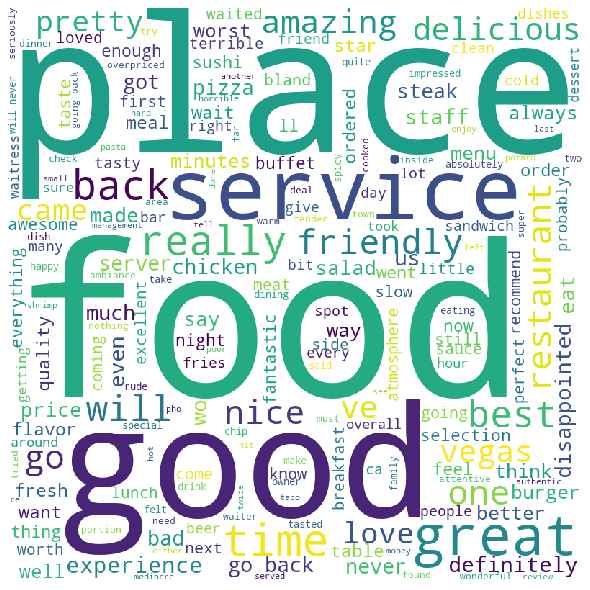

In [14]:
yelp_text = lower_tokenize(yelp[0])
draw_wordcloud(yelp_text)#, stopwords=STOPWORDS.add('n\'t'))

# Celebrities Tweets

In [15]:
tweets

,0,1
13,#SNL Well it's a good thing I stumbled upon Ma...,1
14,'Amy Schumer' appeared on Monday 30 at the 13t...,1
15,...1st of all this is Amy Schumer and she's fu...,1
16,41 Amy Schumer quotes to get you through Wedne...,1
17,AMY SCHUMER TICKETS STILL AVAILABLE for SUNDAY...,1
...,...,...
10439,Well with Zayn joining ISIS it is hard to main...,0
10440,"Well, now that I think of it I'm gonna sleep a...",0
10441,What was the need to @ ZAYN? How thirsty are y...,0
10442,Wtf! I'm happy to see the video and all but wh...,0


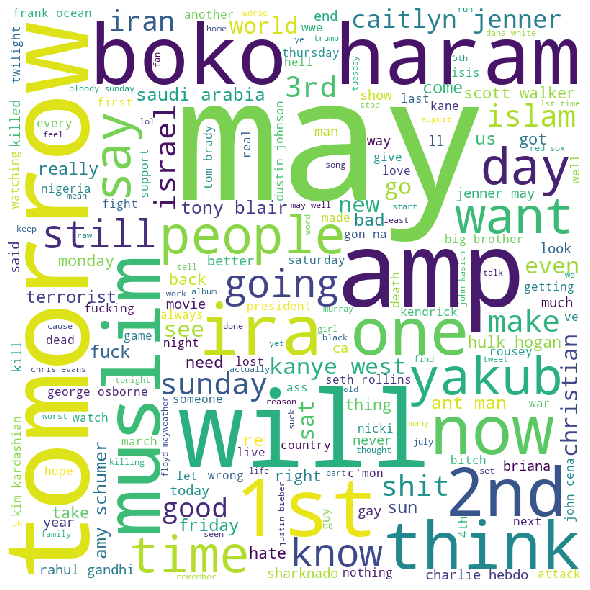

In [16]:
tweeter_text = lower_tokenize(tweets[0])
draw_wordcloud(tweeter_text, stopwords=STOPWORDS.add('n\'t'))

# Airline tweets (multiclass)

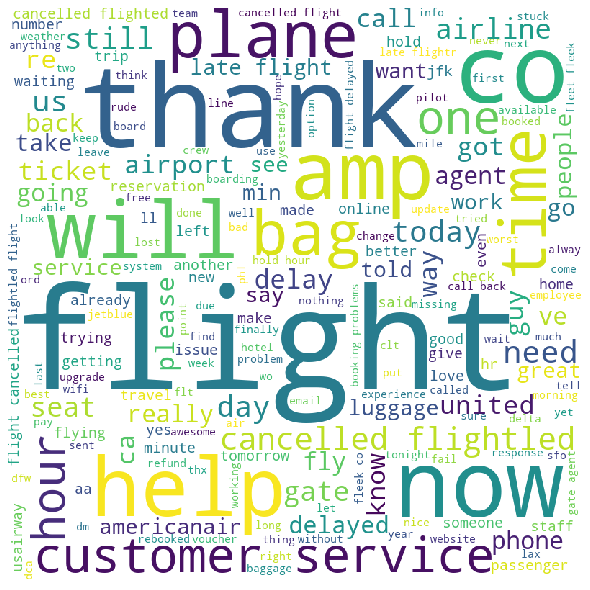

In [17]:
airline_text = lower_tokenize(air_tweets['text'])
draw_wordcloud(airline_text, stopwords=STOPWORDS)

# Balance

In [18]:
print(np.count_nonzero(amazon[1])/amazon.shape[0])
print(np.count_nonzero(imdb[1])/imdb.shape[0])
print(np.count_nonzero(yelp[1])/yelp.shape[0])
print(np.count_nonzero(tweets[1])/tweets.shape[0])

0.5
0.516042780748663
0.5
0.04100041000410004


In [19]:
air_tweets.groupby('airline_sentiment')['airline_sentiment'].count()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

# Lengths

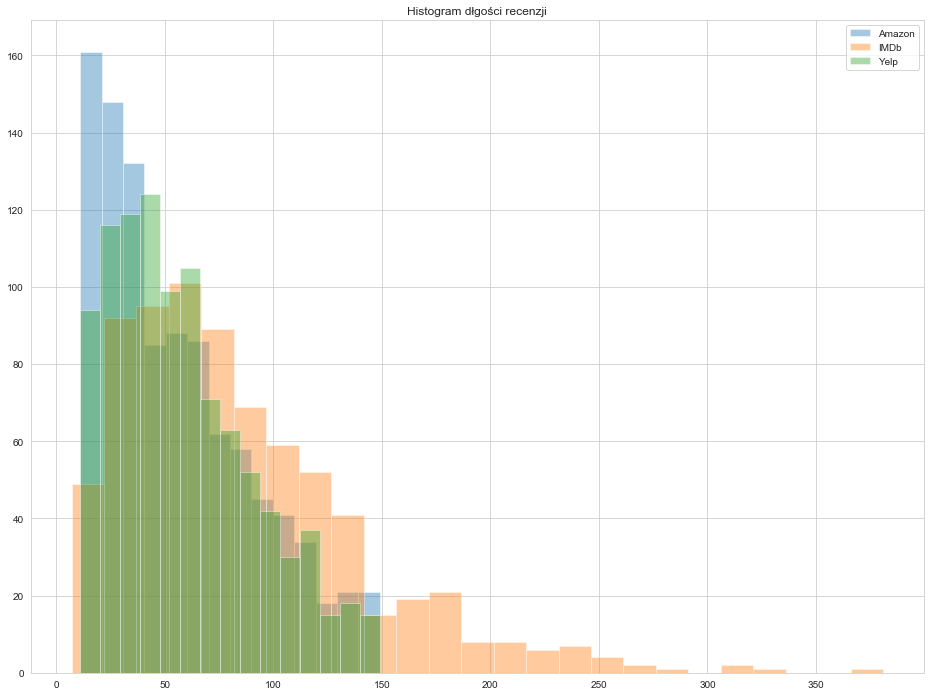

In [9]:
plt.figure(figsize=(16,12))

sns.set_style("whitegrid")
am_lens = list(map(len, amazon[0]))
sns.distplot(am_lens, kde=False)

im_lens = [ i for i in list(map(len, imdb.drop(index=136, axis=0)[0])) if i < 400]
#plt.xlim([0, 500])
sns.distplot(im_lens, kde=False)

ye_lens = list(map(len, yelp[0]))
sns.distplot(ye_lens, kde=False)


plt.title("Histogram dłgości recenzji")
plt.legend(["Amazon", "IMDb", "Yelp"])

In [10]:
np.mean(am_lens)

55.226

In [11]:
np.mean(list(map(len, imdb.drop(index=136, axis=0)[0])))

100.50066934404283

In [12]:
np.mean(ye_lens)

58.316

In [13]:
[ i for i in list(map(len, imdb.drop(index=136, axis=0)[0])) if i > 400]

[4778, 1053, 1562, 479, 4487]

In [14]:
amazon[0]

0      So there is no way for me to plug it in here i...
1                            Good case, Excellent value.
2                                 Great for the jawbone.
3      Tied to charger for conversations lasting more...
4                                      The mic is great.
                             ...                        
995    The screen does get smudged easily because it ...
996    What a piece of junk.. I lose more calls on th...
997                         Item Does Not Match Picture.
998    The only thing that disappoint me is the infra...
999    You can not answer calls with the unit, never ...
Name: 0, Length: 1000, dtype: object

# Built-in preprocessing + different classifiers for binary classification

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
nb_classifier = MultinomialNB()
svc_classifier = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
forest_classifier = RandomForestClassifier(n_estimators=100)
xgb_classifier = XGBClassifier()
tree_classifier = DecisionTreeClassifier()
logreg_classifier = LogisticRegression(solver='lbfgs')

In [19]:
def evaluate_pre_class(text, labels, preprocessor, classifier):
    transformed = preprocessor.fit_transform(text)
    X_train, X_test, y_train, y_test = train_test_split(transformed, labels, test_size=0.33, random_state=43)
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, predictions, average='binary')
    accuracy = classifier.score(X_test, y_test)
    return (accuracy, precision, recall, fscore)

In [9]:
preprocessors = {'CountVectorizer': CountVectorizer(), 'Tfidf': TfidfVectorizer()}
classifiers = {'NaiveBayes': nb_classifier, 'Support Vector Machine': svc_classifier, 'Decision Tree':tree_classifier, 'Random Forest': forest_classifier, 'XGBoost':xgb_classifier, 'logreg_classifier':logreg_classifier}

In [10]:
datasets = {'Amazon':amazon, 'IMDb': imdb, 'Yelp':yelp, 'Tweeter':tweets}

NameError: name 'amazon' is not defined

In [22]:
basic_results = pd.DataFrame(columns=['Dataset', 'Vectorizer', 'Classifier', 'Accuracy', 'Precision', 'Recall', 'Fscore'])
for dataset in datasets:
    for preprocessor in preprocessors:
        for classifier in classifiers:
            (accuracy, precision, recall, fscore) = evaluate_pre_class(\
                                                                                datasets[dataset][0],
                                                                                datasets[dataset][1],
                                                                                preprocessors[preprocessor],
                                                                                classifiers[classifier])
            basic_results = basic_results.append(\
                                                 {'Dataset': dataset,
                                                  'Vectorizer': preprocessor,
                                                  'Classifier': classifier,
                                                  'Accuracy': accuracy,
                                                  'Precision': precision,
                                                  'Recall': recall,
                                                  'Fscore': fscore}, 
                                                 ignore_index=True)
            
            

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
basic_results.groupby(['Dataset', 'Vectorizer']).mean()

Accuracy  Precision    Recall    Fscore
Dataset Vectorizer                                              
Amazon  CountVectorizer  0.788384   0.824616  0.745562  0.780471
        Tfidf            0.782323   0.841333  0.712032  0.767586
IMDb    CountVectorizer  0.695007   0.731254  0.689223  0.709385
        Tfidf            0.706478   0.723150  0.731830  0.726539
Tweeter CountVectorizer  0.984886   0.875802  0.683333  0.713240
        Tfidf            0.979503   0.785450  0.500000  0.511893
Yelp    CountVectorizer  0.790404   0.771904  0.783550  0.774870
        Tfidf            0.802525   0.776076  0.811688  0.792210

In [25]:
basic_results.groupby(['Dataset', 'Classifier']).mean()

Accuracy  Precision    Recall    Fscore
Dataset Classifier                                                     
Amazon  Decision Tree           0.765152   0.811935  0.704142  0.754099
        NaiveBayes              0.815152   0.808760  0.837278  0.822712
        Random Forest           0.787879   0.844903  0.718935  0.776389
        Support Vector Machine  0.806061   0.827403  0.786982  0.805744
        XGBoost                 0.724242   0.840152  0.571006  0.679602
        logreg_classifier       0.813636   0.864695  0.754438  0.805625
IMDb    Decision Tree           0.603239   0.643899  0.593985  0.617436
        NaiveBayes              0.781377   0.815100  0.770677  0.791254
        Random Forest           0.700405   0.725476  0.714286  0.719796
        Support Vector Machine  0.732794   0.748880  0.755639  0.751198
        XGBoost                 0.651822   0.682900  0.661654  0.672019
        logreg_classifier       0.734818   0.746956  0.766917  0.756071
Tweeter Decision Tree           0.995031   0.906250  0.966667  0.935484
        NaiveBayes              0.964596   0.318182  0.116667  0.170732
        Random Forest           0.968323   1.000000  0.150000  0.260504
        Support Vector Machine  0.993168   0.878083  0.950000  0.912141
        XGBoost                 0.994410   0.918280  0.933333  0.925683
        logreg_classifier       0.977640   0.962963  0.433333  0.470855
Yelp    Decision Tree           0.756061   0.757348  0.704545  0.729015
        NaiveBayes              0.818182   0.767180  0.876623  0.818094
        Random Forest           0.795455   0.753682  0.834416  0.791914
        Support Vector Machine  0.822727   0.789514  0.847403  0.817284
        XGBoost                 0.766667   0.787156  0.685065  0.732317
        logreg_classifier       0.819697   0.789057  0.837662  0.812617

In [26]:
basic_results.groupby(['Classifier']).mean()

,Accuracy,Precision,Recall,Fscore
Classifier,,,,
Decision Tree,0.779871,0.779858,0.742335,0.759008
NaiveBayes,0.844827,0.677306,0.650311,0.650698
Random Forest,0.813015,0.831015,0.604409,0.637151
Support Vector Machine,0.838687,0.810970,0.835006,0.821592
XGBoost,0.784285,0.807122,0.712765,0.752405
logreg_classifier,0.836448,0.840918,0.698088,0.711292


# Fine-tuning the best results

In [120]:
basic_results.sort_values(by='Fscore', ascending=False).groupby('Dataset').first()

,Vectorizer,Classifier,Accuracy,Precision,Recall,Fscore
Dataset,,,,,,
Amazon,CountVectorizer,NaiveBayes,0.821212,0.819767,0.834320,0.826979
IMDb,Tfidf,NaiveBayes,0.781377,0.792593,0.804511,0.798507
Tweeter,Tfidf,Decision Tree,0.995031,0.906250,0.966667,0.935484
Yelp,Tfidf,Support Vector Machine,0.851515,0.826087,0.863636,0.844444


## Fine tuning Multinomial NB for Amazon

In [118]:
tuning_results = pd.DataFrame(columns=['C', 'Preprocessor', 'prior', 'Accuracy', 'Precision', 'Recall', 'Fscore'])
for c in [0, 0.01, 0.1, 1, 3, 5]:
    for pre in [False, True]:
        for preprocessor in preprocessors:
            (accuracy, precision, recall, fscore) = (evaluate_pre_class(datasets['Amazon'][0], datasets['Amazon'][1], preprocessors[preprocessor], MultinomialNB(alpha=c, fit_prior=pre)))
            tuning_results = tuning_results.append({
                
                                            'prior':pre,
                                            'C':c,
                                            'Preprocessor':preprocessor,
                                            'Accuracy': accuracy,
                                            'Precision': precision,
                                            'Recall': recall,
                                            'Fscore': fscore}, 
                                            ignore_index=True)

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [121]:
tuning_results.sort_values(by='Accuracy', ascending=False).head(5)

,C,Preprocessor,prior,Accuracy,Precision,Recall,Fscore
9,0.1,Tfidf,False,0.827273,0.814607,0.857988,0.835735
11,0.1,Tfidf,True,0.824242,0.817143,0.846154,0.831395
8,0.1,CountVectorizer,False,0.821212,0.812500,0.846154,0.828986
10,0.1,CountVectorizer,True,0.821212,0.812500,0.846154,0.828986
14,1,CountVectorizer,True,0.821212,0.819767,0.834320,0.826979


## Fine tuning Multinomial NB for IMDb

In [122]:
tuning_results = pd.DataFrame(columns=['C', 'Preprocessor', 'prior', 'Accuracy', 'Precision', 'Recall', 'Fscore'])
for c in [0, 0.01, 0.1, 1, 3, 5]:
    for pre in [False, True]:
        for preprocessor in preprocessors:
            (accuracy, precision, recall, fscore) = (evaluate_pre_class(datasets['IMDb'][0], datasets['IMDb'][1], preprocessors[preprocessor], MultinomialNB(alpha=c, fit_prior=pre)))
            tuning_results = tuning_results.append({
                
                                            'prior':pre,
                                            'C':c,
                                            'Preprocessor':preprocessor,
                                            'Accuracy': accuracy,
                                            'Precision': precision,
                                            'Recall': recall,
                                            'Fscore': fscore}, 
                                            ignore_index=True)

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [123]:
tuning_results.sort_values(by='Fscore', ascending=False).head(10)

,C,Preprocessor,prior,Accuracy,Precision,Recall,Fscore
21,5,Tfidf,False,0.785425,0.781690,0.834586,0.807273
23,5,Tfidf,True,0.777328,0.756579,0.864662,0.807018
19,3,Tfidf,True,0.781377,0.776224,0.834586,0.804348
15,1,Tfidf,True,0.781377,0.792593,0.804511,0.798507
13,1,Tfidf,False,0.785425,0.807692,0.789474,0.798479
17,3,Tfidf,False,0.777328,0.782609,0.812030,0.797048
11,0.1,Tfidf,True,0.785425,0.833333,0.751880,0.790514
14,1,CountVectorizer,True,0.781377,0.837607,0.736842,0.784000
12,1,CountVectorizer,False,0.781377,0.837607,0.736842,0.784000
7,0.01,Tfidf,True,0.777328,0.825000,0.744361,0.782609


# Fine tuning Twitter XGBoost
XGBoost turned out to give better results

In [128]:
tuning_results = pd.DataFrame(columns=['Depth', 'Preprocessor', 'LR', 'Accuracy', 'Precision', 'Recall', 'Fscore'])
for lr in [0.01, 0.05, 0.1, 0.2, 0.3]:
    for depth in [2, 3, 4]:
        for preprocessor in preprocessors:
            (accuracy, precision, recall, fscore) = (evaluate_pre_class(datasets['Tweeter'][0], datasets['Tweeter'][1], preprocessors[preprocessor], XGBClassifier(depth, lr)))
            tuning_results = tuning_results.append({
            
                                            'Depth':depth,
                                            'LR':lr,
                                            'Preprocessor':preprocessor,
                                            'Accuracy': accuracy,
                                            'Precision': precision,
                                            'Recall': recall,
                                            'Fscore': fscore}, 
                                            ignore_index=True)

In [130]:
tuning_results.sort_values(by='Fscore', ascending=False).head(5)

,Depth,Preprocessor,LR,Accuracy,Precision,Recall,Fscore
28,4,CountVectorizer,0.30,0.997516,0.937500,1.000000,0.967742
8,3,CountVectorizer,0.05,0.997516,0.937500,1.000000,0.967742
6,2,CountVectorizer,0.05,0.996273,0.909091,1.000000,0.952381
10,4,CountVectorizer,0.05,0.996273,0.935484,0.966667,0.950820
26,3,CountVectorizer,0.30,0.996273,0.935484,0.966667,0.950820


## Fine tuning yelp SVM

In [97]:
tuning_results = pd.DataFrame(columns=['Kernel', 'C', 'gamma', 'Accuracy', 'Precision', 'Recall', 'Fscore'])
for kernel in ['poly', 'rbf', 'sigmoid']:
    for c in [0.01, 1, 3, 5]:
        for schrinking in [False, True]:
            for gamma in ['scale', 'auto']:
                (accuracy, precision, recall, fscore) = (evaluate_pre_class(datasets['Yelp'][0], datasets['Yelp'][1], preprocessors['Tfidf'], SVC(C=c, kernel=kernel, degree=3, gamma=gamma, shrinking=schrinking)))
                tuning_results = tuning_results.append({
                                                    'Kernel':kernel,
                                                    'C':c,
                                                    'gamma':gamma,
                                                    'Accuracy': accuracy,
                                                    'Precision': precision,
                                                    'Recall': recall,
                                                    'Fscore': fscore}, 
                                                    ignore_index=True)
for c in [0.01, 1, 3, 5]:
    for schrinking in [False, True]:
        (accuracy, precision, recall, fscore) = (evaluate_pre_class(datasets['Yelp'][0], datasets['Yelp'][1], preprocessors['Tfidf'], SVC(C=c, kernel='linear', shrinking=schrinking)))
        tuning_results = tuning_results.append({
                                            'Kernel':'linear',
                                            'C':c,
                                            'gamma':'-',
                                            'Accuracy': accuracy,
                                            'Precision': precision,
                                            'Recall': recall,
                                            'Fscore': fscore}, 
                                            ignore_index=True)

In [98]:
tuning_results.sort_values(by='Fscore', ascending=False).head(5)

,Kernel,C,gamma,Accuracy,Precision,Recall,Fscore
51,linear,1.0,-,0.851515,0.826087,0.863636,0.844444
50,linear,1.0,-,0.851515,0.826087,0.863636,0.844444
38,sigmoid,1.0,scale,0.851515,0.834395,0.850649,0.842444
36,sigmoid,1.0,scale,0.851515,0.834395,0.850649,0.842444
28,rbf,5.0,scale,0.842424,0.810976,0.863636,0.836478
30,rbf,5.0,scale,0.842424,0.810976,0.863636,0.836478
26,rbf,3.0,scale,0.842424,0.810976,0.863636,0.836478
24,rbf,3.0,scale,0.842424,0.810976,0.863636,0.836478
20,rbf,1.0,scale,0.824242,0.796296,0.837662,0.816456
53,linear,3.0,-,0.824242,0.785714,0.857143,0.819876


# Comparing results based on tree depth

In [27]:
newres = pd.DataFrame(columns=['Depth', 'Yelp_accuracy', 'Yelp_recall', 'Amazon_accuracy', 'Amazon_recall', 'Imdb_accuracy', 'Imdb_recall', 'Tweeter_accyracy', 'Tweeter_recall'])

for tree_length in range(3, 17):
    (accuracy1, precision1, recall1, fscore1) = evaluate_pre_class(yelp[0], yelp[1], CountVectorizer(), DecisionTreeClassifier(max_depth=tree_length))
    (accuracy2, precision2, recall2, fscore2) = evaluate_pre_class(amazon[0], amazon[1], CountVectorizer(), DecisionTreeClassifier(max_depth=tree_length))
    (accuracy3, precision3, recall3, fscore3) = evaluate_pre_class(imdb[0], imdb[1], CountVectorizer(), DecisionTreeClassifier(max_depth=tree_length))
    (accuracy4, precision4, recall4, fscore4) = evaluate_pre_class(tweets[0], tweets[1], CountVectorizer(), DecisionTreeClassifier(max_depth=tree_length))

    newres = newres.append(\
                                         {'Depth': tree_length,
                                          'Yelp_accuracy': accuracy1,
                                          'Yelp_recall':recall1, 
                                          'Amazon_accuracy':accuracy2, 
                                          'Amazon_recall':recall2,
                                          'Imdb_accuracy':accuracy3, 
                                          'Imdb_recall':recall3,
                                          'Tweeter_accuracy':accuracy4, 
                                          'Tweeter_recall':recall4}, 
                                         ignore_index=True)

In [28]:
newres

,Depth,Yelp_accuracy,Yelp_recall,Amazon_accuracy,Amazon_recall,Imdb_accuracy,Imdb_recall,Tweeter_accyracy,Tweeter_recall,Tweeter_accuracy
0,3.0,0.657576,0.279221,0.618182,0.278107,0.582996,0.436090,NaN,1.000000,0.996273
1,4.0,0.663636,0.292208,0.630303,0.307692,0.582996,0.436090,NaN,0.966667,0.995031
2,5.0,0.687879,0.350649,0.648485,0.343195,0.591093,0.443609,NaN,0.966667,0.995031
3,6.0,0.712121,0.402597,0.642424,0.343195,0.599190,0.458647,NaN,0.966667,0.995031
4,7.0,0.721212,0.422078,0.657576,0.366864,0.595142,0.466165,NaN,0.966667,0.995031
5,8.0,0.721212,0.448052,0.660606,0.396450,0.595142,0.466165,NaN,0.966667,0.995031
6,9.0,0.736364,0.480519,0.693939,0.508876,0.587045,0.503759,NaN,0.933333,0.993789
7,10.0,0.748485,0.493506,0.706061,0.491124,0.607287,0.601504,NaN,0.966667,0.995031
8,11.0,0.751515,0.512987,0.742424,0.603550,0.591093,0.556391,NaN,0.966667,0.995031
9,12.0,0.757576,0.525974,0.724242,0.526627,0.587045,0.609023,NaN,0.966667,0.996273


### Testing other datasets with classifier trained on one of them

In [29]:
def evaluate_whole_corpus(corpus, train_dataset, test_dataset, preprocessor, classifier):
    preprocessor.fit(corpus)
    train_transformed = preprocessor.transform(train_dataset[0])
    X_train, X_test, y_train, y_test = train_test_split(train_transformed, train_dataset[1], test_size=0.33, random_state=43)
    classifier.fit(X_train, y_train)        
    
    test_transformed = preprocessor.transform(test_dataset[0])
    X_train, X_test, y_train, y_test = train_test_split(test_transformed, test_dataset[1], test_size=0.33, random_state=43)
    
    predictions = classifier.predict(X_test)
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, predictions, average='binary')
    accuracy = classifier.score(X_test, y_test)
    return (accuracy, precision, recall, fscore)

In [30]:
results_whole = pd.DataFrame(columns=['Train dataset', 'Test dataset', 'Vectorizer', 'Classifier', 'Accuracy', 'Precision', 'Recall', 'Fscore'])

joined_reviews = np.concatenate((amazon[0], imdb[0], yelp[0], tweets[0]))

for train_dataset in datasets:
    for preprocessor in preprocessors:
        for classifier in classifiers:
            for test_dataset in datasets:
                # print(f"Accuracy for data set {test_dataset}, vectorized by {preprocessor}, classified by {classifier} trained on {train_dataset}")
                accuracy, precision, recall, fscore = evaluate_whole_corpus(joined_reviews, datasets[train_dataset], datasets[test_dataset], preprocessors[preprocessor], classifiers[classifier])
                results_whole = results_whole.append({\
                                                      'Train dataset':train_dataset,
                                                      'Test dataset':test_dataset,
                                                      'Vectorizer':preprocessor, 
                                                      'Classifier':classifier,
                                                      'Accuracy': accuracy,
                                                      'Precision': precision,
                                                      'Recall': recall,
                                                      'Fscore': fscore}, 
                                                     ignore_index=True)

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
results_whole

,Train dataset,Test dataset,Vectorizer,Classifier,Accuracy,Precision,Recall,Fscore
0,Amazon,Amazon,CountVectorizer,NaiveBayes,0.803030,0.820988,0.786982,0.803625
1,Amazon,IMDb,CountVectorizer,NaiveBayes,0.672065,0.754902,0.578947,0.655319
2,Amazon,Yelp,CountVectorizer,NaiveBayes,0.703030,0.718750,0.597403,0.652482
3,Amazon,Tweeter,CountVectorizer,NaiveBayes,0.829814,0.091603,0.400000,0.149068
4,Amazon,Amazon,CountVectorizer,Support Vector Machine,0.809091,0.808140,0.822485,0.815249
...,...,...,...,...,...,...,...,...
187,Tweeter,Tweeter,Tfidf,XGBoost,0.993789,0.903226,0.933333,0.918033
188,Tweeter,Amazon,Tfidf,logreg_classifier,0.487879,0.000000,0.000000,0.000000
189,Tweeter,IMDb,Tfidf,logreg_classifier,0.461538,0.000000,0.000000,0.000000
190,Tweeter,Yelp,Tfidf,logreg_classifier,0.533333,0.000000,0.000000,0.000000


In [45]:
results_whole.groupby(['Train dataset', 'Test dataset']).max()

Vectorizer         Classifier  Accuracy  Precision  \
Train dataset Test dataset                                                      
Amazon        Amazon            Tfidf  logreg_classifier  0.818182   0.860140   
              IMDb              Tfidf  logreg_classifier  0.680162   0.836066   
              Tweeter           Tfidf  logreg_classifier  0.941615   0.185185   
              Yelp              Tfidf  logreg_classifier  0.733333   0.857143   
IMDb          Amazon            Tfidf  logreg_classifier  0.712121   0.746269   
              IMDb              Tfidf  logreg_classifier  0.797571   0.829268   
              Tweeter           Tfidf  logreg_classifier  0.650932   0.064327   
              Yelp              Tfidf  logreg_classifier  0.700000   0.677165   
Tweeter       Amazon            Tfidf  logreg_classifier  0.490909   1.000000   
              IMDb              Tfidf  logreg_classifier  0.465587   1.000000   
              Tweeter           Tfidf  logreg_classifier  0.995031   1.000000   
              Yelp              Tfidf  logreg_classifier  0.533333   0.000000   
Yelp          Amazon            Tfidf  logreg_classifier  0.757576   0.806897   
              IMDb              Tfidf  logreg_classifier  0.704453   0.745902   
              Tweeter           Tfidf  logreg_classifier  0.792547   0.059633   
              Yelp              Tfidf  logreg_classifier  0.842424   0.822785   

                              Recall    Fscore  
Train dataset Test dataset                      
Amazon        Amazon        0.852071  0.827586  
              IMDb          0.578947  0.655319  
              Tweeter       0.600000  0.181818  
              Yelp          0.681818  0.704698  
IMDb          Amazon        0.751479  0.712991  
              IMDb          0.842105  0.817518  
              Tweeter       0.766667  0.118280  
              Yelp          0.785714  0.709677  
Tweeter       Amazon        0.011834  0.022989  
              IMDb          0.007519  0.014925  
              Tweeter       1.000000  0.937500  
              Yelp          0.000000  0.000000  
Yelp          Amazon        0.786982  0.758209  
              IMDb          0.684211  0.713725  
              Tweeter       0.633333  0.104839  
              Yelp          0.915584  0.833333

In [33]:
results_whole.groupby(['Train dataset', 'Classifier'])['Accuracy'].mean()

Train dataset  Classifier            
Amazon         Decision Tree             0.697100
               NaiveBayes                0.756524
               Random Forest             0.744276
               Support Vector Machine    0.738142
               XGBoost                   0.717507
               logreg_classifier         0.750784
IMDb           Decision Tree             0.568301
               NaiveBayes                0.676526
               Random Forest             0.630088
               Support Vector Machine    0.663760
               XGBoost                   0.613551
               logreg_classifier         0.669272
Tweeter        Decision Tree             0.619582
               NaiveBayes                0.611964
               Random Forest             0.612924
               Support Vector Machine    0.619514
               XGBoost                   0.619669
               logreg_classifier         0.615098
Yelp           Decision Tree             0.685425
            

# Preprocessing pipeline

In [34]:
def remove_punctuation(line):
    return "".join([c for c in line if c not in string.punctuation])

def remove_stopwords(line, stopwords = stopwords.words('english')):
    return [w for w in line if w not in stopwords]

def lemmatizer(line, lemmatizer=WordNetLemmatizer()):
    return [lemmatizer.lemmatize(w) for w in line]

def stemmer(line, stemmer=PorterStemmer()):
    return [stemmer.stem(w) for w in line]

def text_pipeline(text_data, punctuation=True, stopwords=True, morph='lemmitizer'):
    
    #Removing punctuation
    if(punctuation):
        transformed = text_data.apply(remove_punctuation)
    else:
        transformed = text_data
    
    tokenizer = RegexpTokenizer(r'\w+')
    transformed = transformed.apply(lambda x: tokenizer.tokenize(x.lower()))
    
    #Removing stop words
    if stopwords:
        transformed = transformed.apply(remove_stopwords)
    
    
    if morph == 'lemmitizer':
        transformed = transformed.apply(lemmatizer)
    elif morph == 'stemmer':
        transformed = transformed.apply(stemmer)
        
        
    return transformed

def dummy(doc):
    return doc

# Evaluation - different preprocessing parameters, different calssifiers

In [35]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, preprocessor=dummy, tokenizer=dummy)
count_vectorizer = CountVectorizer(preprocessor=dummy, tokenizer=dummy)
vectorizers = {"Tfidf":tfidf_vectorizer, "Count Vectorizer": count_vectorizer}

parameters ={'on':True, 'off':False}
morphs = ['lemmitizer', 'stemmer', 'turned off']

In [36]:
def evaluate_pipeline(input_text, labels, classifier, vectorizer, punctuation=True, stopwords=True, morph='lemmitizer'):
    text_data = text_pipeline(input_text, punctuation, stopwords, morph)
    
    vectorizer.fit(text_data)
    transformed = vectorizer.transform(text_data)
    X_train, X_test, y_train, y_test = train_test_split(transformed, labels, test_size=0.33, random_state=43)

    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, predictions, average='binary')
    accuracy = classifier.score(X_test, y_test)
    return (accuracy, precision, recall, fscore)

In [37]:
results = pd.DataFrame(columns=['DataSet', 'Vectorizer', 'Stopword removing', 'Punctuation removing', 'Morphing', 'Classifier', 'Accuracy', 'Precision', 'Recall', 'Fscore'])
for dataset in datasets:
    for classifier in classifiers:
        for vectorizer in vectorizers:
            for punctuation in parameters:
                for stopword in parameters:
                    for morph in morphs:
                        accuracy, precision, recall, fscore = evaluate_pipeline(datasets[dataset][0], datasets[dataset][1], classifiers[classifier], vectorizers[vectorizer], punctuation=parameters[punctuation], stopwords=parameters[stopword], morph=morph)
                        results = results.append({\
                                                  'DataSet':dataset,
                                                  'Vectorizer':vectorizer,
                                                  'Stopword removing':stopword,
                                                  'Punctuation removing':punctuation,
                                                  'Morphing':morph,
                                                  'Classifier':classifier,
                                                  'Accuracy': accuracy,
                                                  'Precision': precision,
                                                  'Recall': recall,
                                                  'Fscore': fscore}, 
                                                  ignore_index=True)

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anac

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anac

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anac

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anac

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anac

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anac

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anac

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anac

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anac

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anac

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anac

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted 

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anac

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anac

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/hook/anac

In [38]:
results.sort_valuest_

,DataSet,Vectorizer,Stopword removing,Punctuation removing,Morphing,Classifier,Accuracy,Precision,Recall,Fscore
0,Amazon,Tfidf,on,on,lemmitizer,NaiveBayes,0.778788,0.747423,0.857988,0.798898
1,Amazon,Tfidf,on,on,stemmer,NaiveBayes,0.809091,0.767677,0.899408,0.828338
2,Amazon,Tfidf,on,on,turned off,NaiveBayes,0.793939,0.764398,0.863905,0.811111
3,Amazon,Tfidf,off,on,lemmitizer,NaiveBayes,0.793939,0.775956,0.840237,0.806818
4,Amazon,Tfidf,off,on,stemmer,NaiveBayes,0.821212,0.795699,0.875740,0.833803
...,...,...,...,...,...,...,...,...,...,...
571,Tweeter,Count Vectorizer,on,off,stemmer,logreg_classifier,0.990062,0.892857,0.833333,0.862069
572,Tweeter,Count Vectorizer,on,off,turned off,logreg_classifier,0.990062,0.892857,0.833333,0.862069
573,Tweeter,Count Vectorizer,off,off,lemmitizer,logreg_classifier,0.993789,0.931034,0.900000,0.915254
574,Tweeter,Count Vectorizer,off,off,stemmer,logreg_classifier,0.993789,0.931034,0.900000,0.915254


In [39]:
results.groupby(['DataSet', 'Vectorizer']).mean()

Accuracy  Precision    Recall    Fscore
DataSet Vectorizer                                               
Amazon  Count Vectorizer  0.771338   0.799357  0.741042  0.765417
        Tfidf             0.769066   0.814409  0.714661  0.757680
IMDb    Count Vectorizer  0.717499   0.746156  0.729428  0.734581
        Tfidf             0.725484   0.743239  0.755639  0.745492
Tweeter Count Vectorizer  0.985490   0.887117  0.700000  0.745195
        Tfidf             0.980521   0.778210  0.532870  0.555256
Yelp    Count Vectorizer  0.777652   0.765164  0.761273  0.759544
        Tfidf             0.782365   0.762353  0.782648  0.768724

In [41]:
results.groupby(['DataSet', 'Stopword removing']).mean()

Accuracy  Precision    Recall    Fscore
DataSet Stopword removing                                         
Amazon  off                0.785522   0.821944  0.744822  0.778451
        on                 0.754882   0.791822  0.710881  0.744645
IMDb    off                0.707715   0.734979  0.713764  0.723272
        on                 0.735268   0.754416  0.771303  0.756802
Tweeter off                0.982557   0.841578  0.592593  0.626984
        on                 0.983454   0.823749  0.640278  0.673466
Yelp    off                0.795412   0.772817  0.796356  0.782797
        on                 0.764604   0.754699  0.747565  0.745471

In [42]:
results.groupby(['DataSet', 'Morphing']).mean()

Accuracy  Precision    Recall    Fscore
DataSet Morphing                                           
Amazon  lemmitizer  0.762121   0.800052  0.717332  0.752789
        stemmer     0.778346   0.807982  0.746548  0.772350
        turned off  0.770139   0.812614  0.719675  0.759505
IMDb    lemmitizer  0.716430   0.738655  0.740915  0.736244
        stemmer     0.732709   0.759120  0.739975  0.747283
        turned off  0.715334   0.736318  0.746711  0.736583
Tweeter lemmitizer  0.983204   0.829929  0.622222  0.657697
        stemmer     0.983100   0.834351  0.619444  0.651918
        turned off  0.982712   0.833710  0.607639  0.641061
Yelp    lemmitizer  0.779230   0.762012  0.772998  0.763974
        stemmer     0.780303   0.764354  0.770698  0.763927
        turned off  0.780492   0.764910  0.772186  0.764501

In [43]:
results.groupby(['DataSet', 'Classifier']).mean()

Accuracy  Precision    Recall    Fscore
DataSet Classifier                                                     
Amazon  Decision Tree           0.738258   0.770632  0.696006  0.730949
        NaiveBayes              0.803157   0.778918  0.861193  0.817539
        Random Forest           0.776768   0.826869  0.714497  0.765570
        Support Vector Machine  0.789646   0.815215  0.763807  0.787814
        XGBoost                 0.719697   0.820123  0.579635  0.678999
        logreg_classifier       0.793687   0.829541  0.751972  0.788418
IMDb    Decision Tree           0.654352   0.684054  0.677318  0.676027
        NaiveBayes              0.773785   0.793598  0.784774  0.788270
        Random Forest           0.710695   0.761814  0.679825  0.716449
        Support Vector Machine  0.762821   0.776714  0.785088  0.780033
        XGBoost                 0.665317   0.681649  0.732769  0.697316
        logreg_classifier       0.761977   0.770358  0.795426  0.782125
Tweeter Decision Tree           0.994048   0.898763  0.947222  0.922088
        NaiveBayes              0.967340   0.370005  0.190278  0.241232
        Random Forest           0.974017   0.980569  0.311111  0.460442
        Support Vector Machine  0.992029   0.884701  0.904167  0.893185
        XGBoost                 0.994151   0.906513  0.940278  0.922766
        logreg_classifier       0.976449   0.955429  0.405556  0.461638
Yelp    Decision Tree           0.739394   0.736300  0.689394  0.711822
        NaiveBayes              0.790530   0.731932  0.873377  0.795818
        Random Forest           0.786742   0.782088  0.756494  0.767182
        Support Vector Machine  0.798864   0.765868  0.820346  0.792071
        XGBoost                 0.762753   0.801863  0.660173  0.721196
        logreg_classifier       0.801768   0.764499  0.831981  0.796716

In [54]:
results.groupby(['DataSet', 'Punctuation removing']).mean()

Accuracy  Precision    Recall    Fscore
DataSet Punctuation removing                                         
Amazon  off                   0.772433   0.813621  0.723784  0.762480
        on                    0.767971   0.800145  0.731920  0.760616
IMDb    off                   0.720535   0.747075  0.732978  0.736433
        on                    0.722447   0.742320  0.752089  0.743641
Tweeter off                   0.984300   0.837883  0.650463  0.676031
        on                    0.981712   0.827444  0.582407  0.624420
Yelp    off                   0.775379   0.760016  0.765061  0.758609
        on                    0.784638   0.767500  0.778860  0.769660

# Save results

In [55]:
basic_results.to_csv('./basic_results.csv')
results_whole.to_csv('./whole_results.csv')
results.to_csv('./end_results.csv')

# Examples

In [55]:
sample = imdb[0][5]
print(sample)

sample = remove_punctuation(sample)
print("\nRemoved punctuation:")
print(sample)


tokenizer = RegexpTokenizer(r'\w+')
print("\nTokenized:")
tokenized = tokenizer.tokenize(sample.lower())
print(tokenized)

tokenized = remove_stopwords(tokenized)
print("\nRemoved stopwords:")
print(tokenized)



print("\nLemmatized:")
print(lemmatizer(tokenized))

print("\nStemmed:")
print(stemmer(tokenized))


The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  

Removed punctuation:
The rest of the movie lacks art charm meaning If its about emptiness it works I guess because its empty  

Tokenized:
['the', 'rest', 'of', 'the', 'movie', 'lacks', 'art', 'charm', 'meaning', 'if', 'its', 'about', 'emptiness', 'it', 'works', 'i', 'guess', 'because', 'its', 'empty']

Removed stopwords:
['rest', 'movie', 'lacks', 'art', 'charm', 'meaning', 'emptiness', 'works', 'guess', 'empty']

Lemmatized:
['rest', 'movie', 'lack', 'art', 'charm', 'meaning', 'emptiness', 'work', 'guess', 'empty']

Stemmed:
['rest', 'movi', 'lack', 'art', 'charm', 'mean', 'empti', 'work', 'guess', 'empti']


In [56]:
tweets_tree = DecisionTreeClassifier(max_depth=2)

tweet_vectorizer = CountVectorizer()
transformed = tweet_vectorizer.fit_transform(raw_documents=tweets[0])
X_train, X_test, y_train, y_test = train_test_split(transformed, tweets[1], test_size=0.33, random_state=43)
tweets_tree.fit(X_train, y_train)
predictions = tweets_tree.predict(X_test)
#precision, recall, fscore, support = precision_recall_fscore_support(y_test, predictions, average='binary')
print(tweets_tree.score(X_test, y_test))

x = tweet_vectorizer.vocabulary_
tweeter_vocab = [k for k, v in sorted(x.items(), key=lambda item: item[1])]

0.9925465838509316


/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


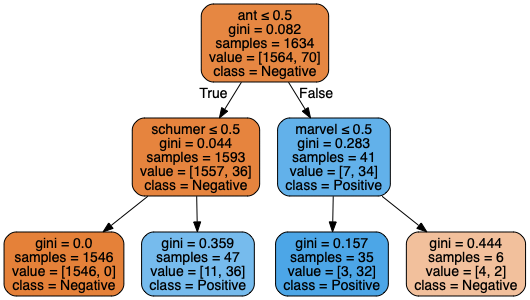

In [57]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tweets_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=tweeter_vocab,
               class_names=['Negative', 'Positive'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Multi class clasification

In [10]:
def map_to_vector(word):
    if word == 'negative':
        return [1, 0, 0]
    if word == 'neutral':
        return [0, 1, 0]
    if word == 'positive':
        return [0, 0, 1]
    
def map_to_number(word):
    if word == 'negative':
        return 0
    if word == 'neutral':
        return 1
    if word == 'positive':
        return 2

In [11]:
air_y = np.array([np.array(map_to_number(w)) for w in air_tweets['airline_sentiment']])

In [26]:
def evaluate_multiclass(text, labels, preprocessor, classifier):
    transformed = preprocessor.fit_transform(text)
    X_train, X_test, y_train, y_test = train_test_split(transformed, labels, test_size=0.33, random_state=43)
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, predictions, average='weighted')
    accuracy = classifier.score(X_test, y_test)
    return (accuracy, precision, recall, fscore)

In [27]:
multi_results = pd.DataFrame(columns=['Vectorizer', 'Classifier', 'Accuracy', 'Precision', 'Recall', 'Fscore'])

for preprocessor in preprocessors:
    for classifier in classifiers:
        (accuracy, precision, recall, fscore) = evaluate_multiclass(\
                                                                            air_tweets['text'],
                                                                            air_y,
                                                                            preprocessors[preprocessor],
                                                                            classifiers[classifier])
        multi_results = multi_results.append(\
                                             {'Vectorizer': preprocessor,
                                              'Classifier': classifier,
                                              'Accuracy': accuracy,
                                              'Precision': precision,
                                              'Recall': recall,
                                              'Fscore': fscore}, 
                                             ignore_index=True)



/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


KeyboardInterrupt: 

In [28]:
multi_results

,Vectorizer,Classifier,Accuracy,Precision,Recall,Fscore
0,CountVectorizer,NaiveBayes,0.749793,0.741768,0.749793,0.724593
1,CountVectorizer,Support Vector Machine,0.776490,0.775715,0.776490,0.775887
2,CountVectorizer,Decision Tree,0.700124,0.695285,0.700124,0.697404
3,CountVectorizer,Random Forest,0.758071,0.757527,0.758071,0.731860
4,CountVectorizer,XGBoost,0.724131,0.723332,0.724131,0.678417
5,CountVectorizer,logreg_classifier,0.796151,0.793540,0.796151,0.794024
6,Tfidf,NaiveBayes,0.669909,0.733100,0.669909,0.578199
7,Tfidf,Support Vector Machine,0.802152,0.796983,0.802152,0.794107
8,Tfidf,Decision Tree,0.690397,0.687721,0.690397,0.688848
9,Tfidf,Random Forest,0.750207,0.755059,0.750207,0.720381


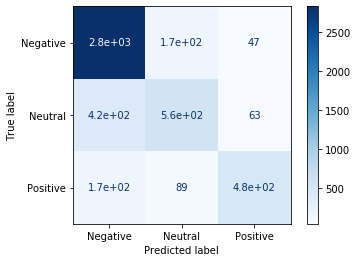

In [49]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

text = air_tweets['text']
labels = air_y
preprocessor = TfidfVectorizer()
classifier = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

transformed = preprocessor.fit_transform(text)
X_train, X_test, y_train, y_test = train_test_split(transformed, labels, test_size=0.33, random_state=40)
classifier.fit(X_train, y_train)
plot_confusion_matrix(classifier, X=X_test, y_true=y_test, display_labels=['Negative', 'Neutral', 'Positive'], cmap=plt.cm.Blues)

In [50]:
air_acc = classifier.score(X_test, y_test)
air_prec, air_rec, air_fsc, _ = precision_recall_fscore_support(y_test, classifier.predict(X_test), average='weighted')

In [51]:
air_acc

0.8021523178807947

In [15]:
#feature_array = np.array(preprocessor.get_feature_names())
#tfidf_sorting = np.argsort(transformed.toarray()).flatten()[::-1]

In [ ]:
#feature_array[tfidf_sorting][:10]

In [ ]:
#np.unique(labels, return_counts=True)

## Balansowanie zbioru
#### Klasyfikatory zostaną wytrenowane na zbalansowanym zbiorze, ale użyte na całym

In [69]:
df_to_balance = pd.DataFrame(data={'text':text, 'labels':labels})

### Przez odejmowanie

In [108]:
min_amount = df_to_balance.groupby(labels)['labels'].count().min()

air_sub_balanced = pd.concat([df_to_balance[df_to_balance['labels']==0][:min_amount], \
                              df_to_balance[df_to_balance['labels']==1][:min_amount], \
                              df_to_balance[df_to_balance['labels']==2][:min_amount]])

In [109]:
air_sub_balanced.groupby('labels')['labels'].count()

labels
0    2363
1    2363
2    2363
Name: labels, dtype: int64

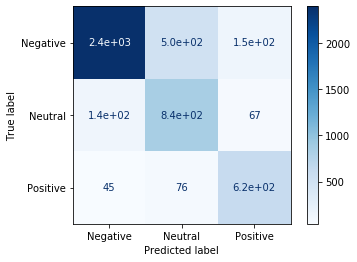

In [110]:
b_text = air_sub_balanced['text']
b_labels = air_sub_balanced['labels']
b_classifier = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')


b_transformed = preprocessor.transform(b_text)
b_X_train, b_X_test, b_y_train, b_y_test = train_test_split(b_transformed, b_labels, test_size=0.33, random_state=43)
b_classifier.fit(b_X_train, b_y_train)
plot_confusion_matrix(b_classifier, X=X_test, y_true=y_test, display_labels=['Negative', 'Neutral', 'Positive'], cmap=plt.cm.Blues)

In [111]:
b_air_acc = b_classifier.score(X_test, y_test)
b_air_prec, b_air_rec, b_air_fsc, _ = precision_recall_fscore_support(y_test, b_classifier.predict(X_test), average='weighted')

In [ ]:
min_amount = df_to_balance.groupby(labels)['labels'].count().min()
df2 = df_to_balance.sample(frac=1).reset_index(drop=True)

air_sub_balanced = pd.concat([df2[df2['labels']==0][:min_amount], \
                              df2[df2['labels']==1][:min_amount], \
                              df2[df2['labels']==2][:min_amount]])

air_sub_balanced = pd.concat([air_sub_balanced, air_sub_balanced, air_sub_balanced, air_sub_balanced])

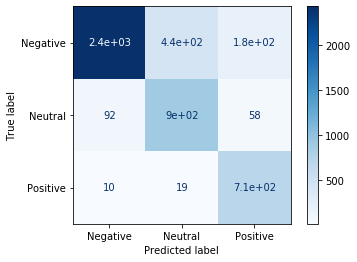

In [99]:
b_text = air_sub_balanced['text']
b_labels = air_sub_balanced['labels']
b_classifier = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')


b_transformed = preprocessor.transform(b_text)
b_X_train, b_X_test, b_y_train, b_y_test = train_test_split(b_transformed, b_labels, test_size=0.33, random_state=43)
b_classifier.fit(b_X_train, b_y_train)
plot_confusion_matrix(b_classifier, X=X_test, y_true=y_test, display_labels=['Negative', 'Neutral', 'Positive'], cmap=plt.cm.Blues)

In [101]:
b_air_acc_2 = b_classifier.score(X_test, y_test)
b_air_prec_2, b_air_rec_2, b_air_fsc_2, _ = precision_recall_fscore_support(y_test, b_classifier.predict(X_test), average='weighted')

### Przez mnożenie

In [85]:
air_multiply_balance = pd.concat([df_to_balance[df_to_balance['labels']==0],                \
                                  pd.concat([df_to_balance[df_to_balance['labels']==1]]*3), \
                                  pd.concat([df_to_balance[df_to_balance['labels']==2]]*4)])

In [86]:
air_multiply_balance.groupby('labels')['labels'].count()

labels
0    9178
1    9297
2    9452
Name: labels, dtype: int64

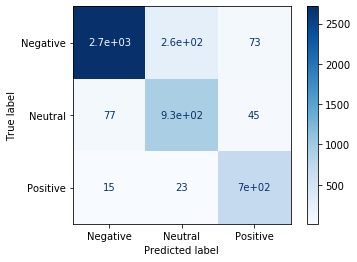

In [87]:
b2_text = air_multiply_balance['text']
b2_labels = air_multiply_balance['labels']
b2_classifier = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')


b2_transformed = preprocessor.transform(b2_text)
b2_X_train, b2_X_test, b2_y_train, b2_y_test = train_test_split(b2_transformed, b2_labels, test_size=0.33, random_state=43)
b2_classifier.fit(b2_X_train, b2_y_train)
plot_confusion_matrix(b2_classifier, X=X_test, y_true=y_test, display_labels=['Negative', 'Neutral', 'Positive'], cmap=plt.cm.Blues)

In [88]:
b2_air_acc = b2_classifier.score(X_test, y_test)
b2_air_prec, b2_air_rec, b2_air_fsc, _ = precision_recall_fscore_support(y_test, b2_classifier.predict(X_test), average='weighted')

In [112]:
balancing_results = pd.DataFrame({\
                                  'Balancing':['None', 'Substitution','Substitution2', 'Multiplication'],
                                  'Accuracy':[air_acc, b_air_acc,b_air_acc_2, b2_air_acc],
                                  'Precision:':[air_prec, b_air_prec,b_air_prec_2, b2_air_prec],
                                  'Recall':[air_rec, b_air_rec,b_air_rec_2, b2_air_rec],
                                  'Fscore':[air_fsc, b_air_fsc,b_air_fsc_2, b2_air_fsc]})

In [113]:
balancing_results

,Balancing,Accuracy,Precision:,Recall,Fscore
0,None,0.802152,0.795040,0.802152,0.793472
1,Substitution,0.796772,0.826817,0.796772,0.804008
2,Substitution2,0.835058,0.863036,0.835058,0.839602
3,Multiplication,0.897765,0.906386,0.897765,0.899789
